In [1]:
using PyPlot
using funciones

INFO: Loading help data...


In [2]:
function η(S::Array{Float64},N::Int64,M::Int64,i::Int64,j::Int64, E::Float64, ΔE, Emin) # parametro de actptacion
    return min(1, exp(S[E - Emin + 1]-S[E - Emin + 1 + ΔE]))
end

η (generic function with 1 method)

In [3]:
function normalizarS(N::Int,M::Int, S::Array{Float64}) # normalizacion de resultado
    Smin = minimum(S[S.!=0])
    for i in 1:4*N*M+1
        if S[i] != 0
            S[i] = S[i]/Smin
        end
    end
    S
end

normalizarS (generic function with 1 method)

In [4]:
function wanglandau(N::Int,M::Int)  # algoritmo principal
    f, N2, Emin = 1, N*M, -2*N*M
    σ = config(N,M)
    E = energia(σ)
    H = zeros(Int,4*N2 + 1)
    S = zeros(4*N2 + 1)
    k=0
    while f > 1e-7
        i,j = rand(1:N),rand(1:M)
        ΔE = -2*energia_ij(σ.conf,N,M,i,j)
    
        if rand() < η(S,N,M,i,j,E,ΔE,Emin)
            E = E + ΔE
            σ.conf = flip_one(σ.conf,i,j)
        end
        
        H[E - Emin + 1] += 1
        S[E - Emin + 1] += f
        k += 1
        if k > 4*N2 && minimum(H[H.!=0])>=0.85*mean(H[H.!=0])
            H[:] = 0
            f *= 0.5 
            k=0
        end
    end
    normalizarS(N,M,S)
end

wanglandau (generic function with 1 method)

In [5]:
#Se usaran en todo el notebook
N, M = 15, 15
@time SS1 = wanglandau(N,M)
SS1[SS1.!=0]

elapsed time: 10206.886649461 seconds (4815651415528 bytes allocated, 32.65% gc time)


210-element Array{Float64,1}:
 1.0    
 1.0006 
 1.00067
 1.00113
 1.00128
 1.00161
 1.00181
 1.00209
 1.0023 
 1.00255
 1.00276
 1.00299
 1.00321
 ⋮      
 1.00551
 1.00527
 1.00502
 1.00478
 1.00452
 1.00425
 1.00398
 1.0037 
 1.0034 
 1.00309
 1.00275
 1.00239

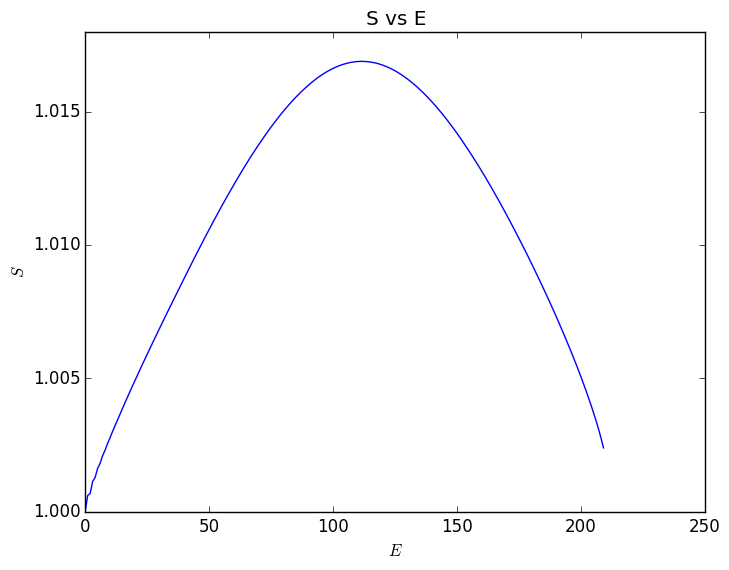

PyObject <matplotlib.text.Text object at 0x7fec8a9d9c10>

In [6]:
# grafica de entropia
figure()
plot(SS1[SS1.!=0])
title("S vs E")
xlabel(L"E")
ylabel(L"S")

In [7]:
function Z(T::Float64,N::Int,M::Int,S::Array{Float64}) # calculo de funcion de particion
    ZZ = 0
    Energias = [-2*M*N:2*M*N]
    g(S)=[exp(i) for i in S] 
    for E in Energias
        ZZ += g(S)[E-Energias[1]+1]*exp(-β(T)*E)
    end
    ZZ
end

Z (generic function with 1 method)

elapsed time: 123.712572832 seconds (64891052328 bytes allocated, 43.05% gc time)

In [8]:
Temp = 1.
@time Z1=Z(Temp,5,5,SS1)

elapsed time: 0.019861971 seconds (1079508 bytes allocated)


8.202083378201366e21

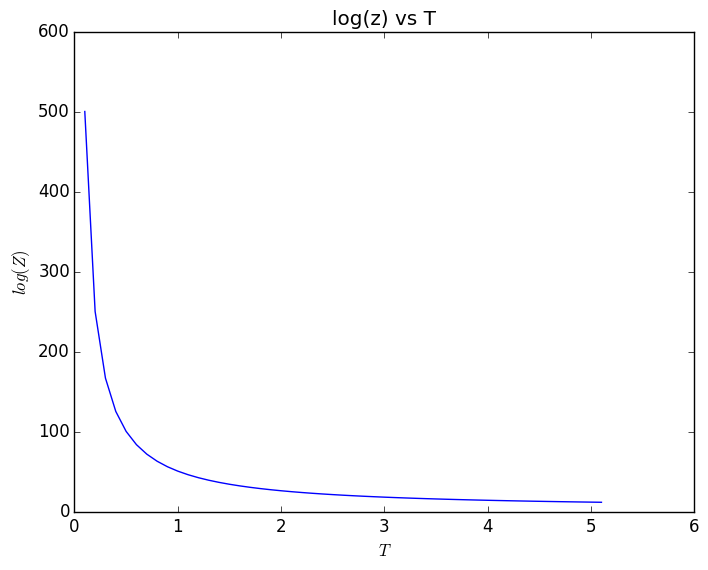

PyObject <matplotlib.text.Text object at 0x7fec8a8c02d0>

In [9]:
#es mas importante el logaritmo de la funcion de particion
logZ1= [log(Z(T,5,5,SS1)) for T in 0.1:0.1:5.1]

figure()
plot([0.1:0.1:5.1], logZ1)
title("log(z) vs T")
xlabel(L"T")
ylabel(L"log(Z)")

In [10]:
F(T::Float64,N::Int,M::Int,S::Array{Float64}) = -T*log(Z(T,N,M,S)) #Energia libre

F (generic function with 1 method)

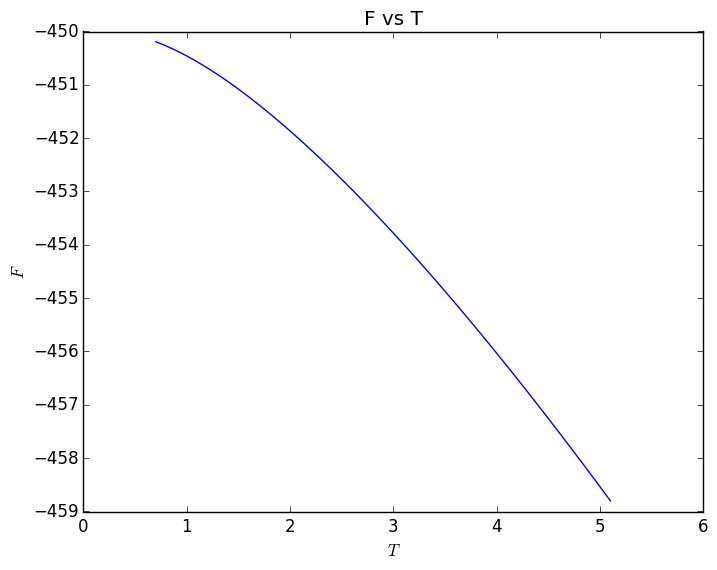

PyObject <matplotlib.text.Text object at 0x7fec8a8139d0>

In [11]:
F1 = [F(T,N,M,SS1) for T in 0.1:0.1:5.1]

figure()
plot([0.1:0.1:5.1], F1)
title("F vs T")
xlabel(L"T")
ylabel(L"F")

In [12]:
function Ebarra(T::Float64,N::Int,M::Int,S::Array{Float64})# <E>
    Eprom = 0
    Emin, Emax = -2*N*M, 2*N*M
    S2 = copy(S)
    S2[S2.!=0] =1
    Energias = [Emin:Emax]
    for E in Energias
        Eprom += E*exp(-β(T)*E)*S2[E-Emin+1]
    end
    Eprom/Z(T,N,M,S)
end

Ebarra (generic function with 1 method)

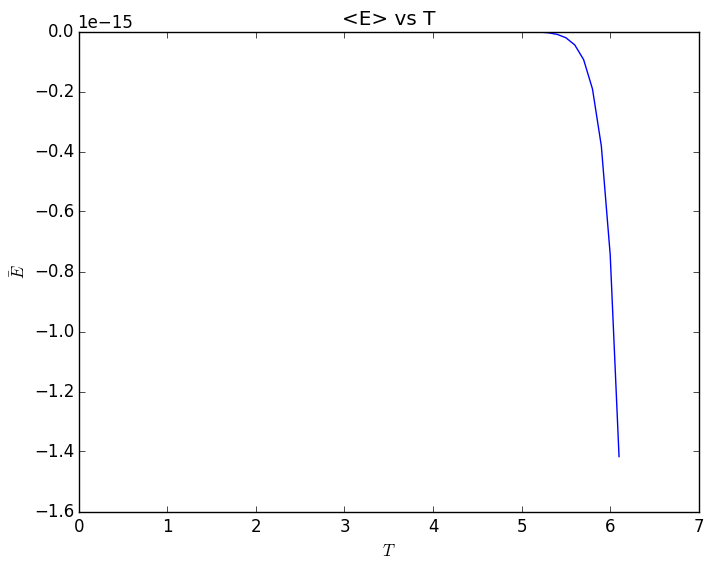

PyObject <matplotlib.text.Text object at 0x7fec8a79e450>

In [13]:
Ebarra1 = [Ebarra(T,N,M,SS1) for T in 0.1:0.1:6.1]

figure()
plot([0.1:0.1:6.1], Ebarra1)
title("<E> vs T")
xlabel(L"T")
ylabel(L"\bar{E}")

In [14]:
function Ebarra2(T::Float64,N::Int,M::Int,S::Array{Float64}) # <E^2>
    Eprom = 0
    Emin, Emax = -2*N*M, 2*N*M
    S2 = copy(S)
    S2[S2.!=0] = 1
    Energias = [Emin:Emax]
    for E in Energias
        Eprom += E^2*exp(-β(T)*E)*S2[E-Emin+1]
    end
    Eprom/Z(T,M,N,S)
end

Ebarra2 (generic function with 1 method)

In [15]:
Cv(T::Float64,N::Int,M::Int,S::Array{Float64}) = (β(T))^2(Ebarra2(T,N,M,S) - (Ebarra(T,N,M,S))^2) #capacidad calorifica

Cv (generic function with 1 method)

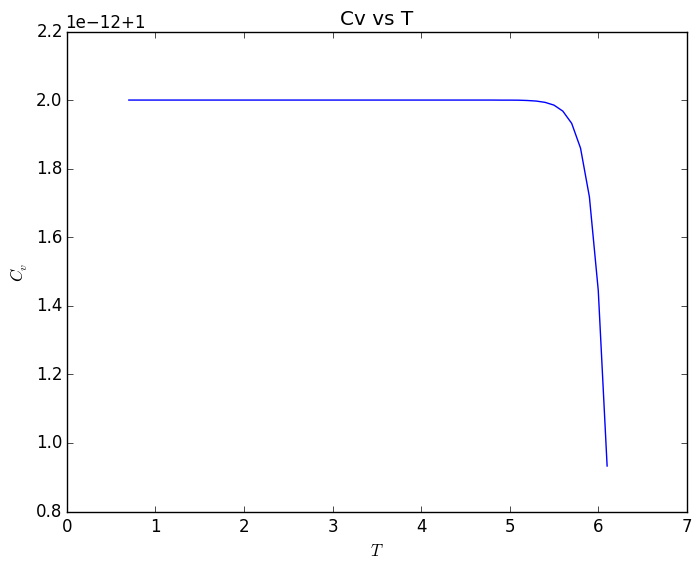

PyObject <matplotlib.text.Text object at 0x7fec8a518cd0>

In [17]:
Cv1 = [Cv(T,N,M,SS1) for T in 0.1:0.1:6.1]

figure()
plot([0.1:0.1:6.1], Cv1)
title("Cv vs T")
xlabel(L"T")
ylabel(L"C_v")